In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
Data = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/Weather.csv')

In [3]:
Data

,Outlook,Temp,Humidity,Windy,Play,Unnamed: 5
0,Rainy,Hot,High,f,no,NaN
1,Rainy,Hot,High,t,no,NaN
2,Overcast,Hot,High,f,yes,NaN
3,Sunny,Mild,High,f,yes,NaN
4,Sunny,Cool,Normal,f,yes,NaN
5,Sunny,Cool,Normal,t,no,NaN
6,Overcast,Cool,Normal,t,yes,NaN
7,Rainy,Mild,High,f,no,NaN
8,Rainy,Cool,Normal,f,yes,NaN
9,Sunny,Mild,Normal,f,yes,NaN


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Outlook     14 non-null     object 
 1   Temp        14 non-null     object 
 2   Humidity    14 non-null     object 
 3   Windy       14 non-null     object 
 4   Play        14 non-null     object 
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 800.0+ bytes


In [5]:
Data.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play', 'Unnamed: 5'], dtype='object')

In [6]:
Data = Data.drop(['Unnamed: 5'],axis=1)
Data.head()

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes


In [7]:
Data.tail()

,Outlook,Temp,Humidity,Windy,Play
9,Sunny,Mild,Normal,f,yes
10,Rainy,Mild,Normal,t,yes
11,Overcast,Mild,High,t,yes
12,Overcast,Hot,Normal,f,yes
13,Sunny,Mild,High,t,no


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Windy     14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [9]:
Data.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')

In [10]:
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

In [11]:
Data['Outlook']=le.fit_transform(Data['Outlook'])
Data.head()

,Outlook,Temp,Humidity,Windy,Play
0,1,Hot,High,f,no
1,1,Hot,High,t,no
2,0,Hot,High,f,yes
3,2,Mild,High,f,yes
4,2,Cool,Normal,f,yes


In [12]:
Data['Temp']=le.fit_transform(Data['Temp'])
Data['Humidity'] = le.fit_transform(Data['Humidity'])
Data['Windy']= le.fit_transform(Data['Windy'])
Data['Play']= le.fit_transform(Data['Play'])
Data.head()

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [13]:
Feature = Data.drop(['Play'],axis=1)
Feature.head()

,Outlook,Temp,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0


In [14]:
Label = Data['Play']
Label[0:5]

0    0
1    0
2    1
3    1
4    1
Name: Play, dtype: int32

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Feature, Label)
clf

DecisionTreeClassifier()

In [16]:
clf.predict([[0,1,0,0]]) # yes i can play the match

array([1])

In [17]:
clf.classes_

array([0, 1])

In [18]:
clf.n_classes_

2

In [19]:
clf.n_features_

4

In [20]:
clf.score(Feature,Label)

1.0

[Text(148.79999999999998, 269.082, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(99.19999999999999, 209.286, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(198.39999999999998, 209.286, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(99.19999999999999, 149.49, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(49.599999999999994, 89.69399999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(148.79999999999998, 89.69399999999999, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(99.19999999999999, 29.897999999999968, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(198.39999999999998, 29.897999999999968, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(297.59999999999997, 149.49, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(247.99999999999997, 89.69399999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(347.19999999999993, 89.69399999999999, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = 

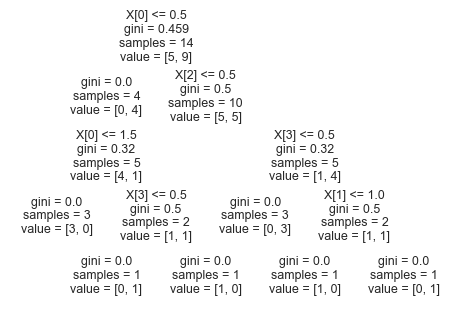

In [21]:
tree.plot_tree(clf)